<a href="https://colab.research.google.com/github/MatheusrCunha/py_class/blob/main/Trabalho1_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 6.9 MB/s eta 0:00:00
Digite o numerador da funcao transferencia: 1 5
Digite o denominador da funcao transferencia: 1 10 16
Numerador:  ['1', '5']
Denominador:  ['1', '10', '16']

     s + 5
---------------
s^2 + 10 s + 16

Polos :  [-8.+0.j -2.+0.j]
Zeros :  [-5.+0.j]


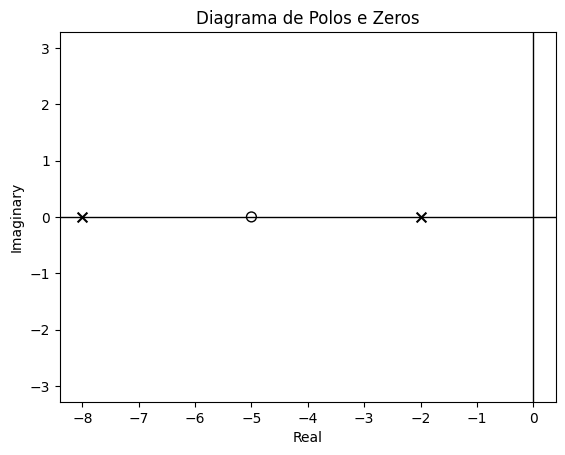

Quantos polos:  2
Quantos Zeros:  1


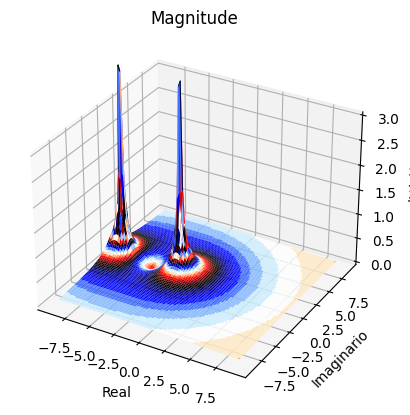

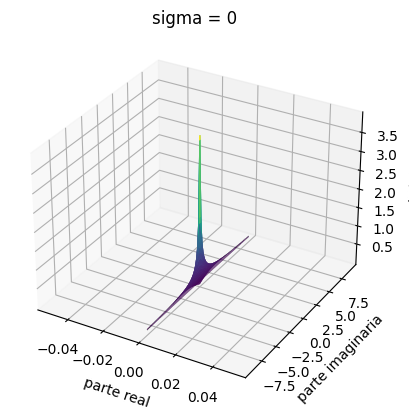

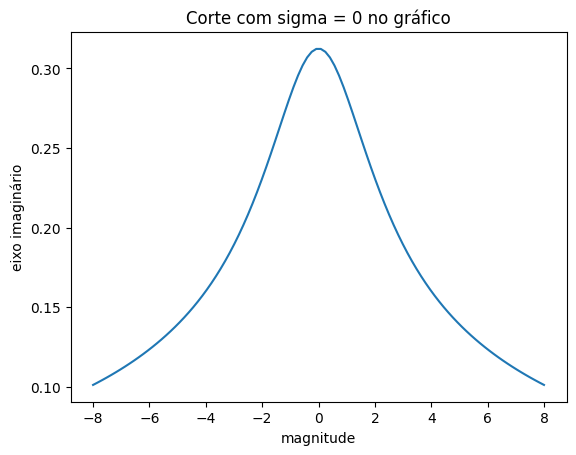

In [1]:
try:
    import control as ctl
except:
    %pip install control
import control as ctl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Num = input('Digite o numerador da funcao transferencia: ') #Entre com o numerador da ft, ex: (1 3) = (s + 3)
Den = input('Digite o denominador da funcao transferencia: ') #Entre com o denominador da ft, ex: (1 2) = (s + 2)

Ns = Num.split() #Retorna uma lista de string, quebra no espaço
Ds = Den.split() #Retorna uma lista de string, quebra no espaço

print('Numerador: ', Ns) #print o numerador
print('Denominador: ', Ds) #print o denominador

Numvet = list(map(float, Ns)) #Converte para float
DenVet = list(map(float, Ds)) #Converte para float

sys = ctl.tf(Numvet, DenVet) #cria a função de transferência
print(sys) #Mostra a função de tranferência

G = sys #Salva em G o conteúdo de sys
polos = ctl.poles(sys) #calcula os polos da função
zeros = ctl.zeros(sys) #calcula os polos da função

print('Polos : ',polos)  #Imprime os polos
print('Zeros : ',zeros)  #Imprime os zeros

Fs = ctl.pzmap(sys,1,0,'Diagrama de Polos e Zeros') #Monta o diagrama de polos e zeros

plt.show() #cria uma figura                                                         

qtdpole=len(polos) #Cálcula a quantidade de polos
qtdzero=len(zeros) #Cálcula a quantidade de zeros

print('Quantos polos: ', qtdpole)  #Mostra a quantidade de polos
print('Quantos Zeros: ', qtdzero)  #Mostra a quantidade de zeros

#Gráfico 3D
fig = plt.figure() #cria uma figura
ax = plt.axes(projection='3d') #cria um objeto 3d

# Create grid of points
x = np.linspace(-9, 9, 100) #cria um vetor de 100 elementos espaçados 
y = np.linspace(-9, 9, 100) #cria um vetor de 100 elementos espaçados
X, Y = np.meshgrid(x, y)  #cria uma matriz bidimensional

Z = np.zeros_like(X) #cria uma matriz de zeros
for i in range(X.shape[0]): #percorre a matriz X
    for j in range(Y.shape[1]): #percorre a matriz Y
        s = X[i,j] + 1j*Y[i,j]  #cria um número complexo s
        Z[i,j] = np.abs(G(s))   #Calcula o módulo de FT do número complexo s

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.flag, linewidth=0, edgecolor='none')  #plota uma figura tridimensional
ax.set_title('Magnitude')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginario')
ax.set_zlabel('|H(s)|')
ax.set_zlim(0,3)

# Gráfico com corte em x=0
x = np.linspace(-9, 9, 100)
y = np.linspace(-9, 9, 100)
X, Y = np.meshgrid(x, y) #cria uma matriz bidimensional

fig2 = plt.figure()  #cria uma figura
ax = plt.axes(projection='3d') #cria um objeto 3d
ax.plot_surface(0, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')  #plota uma figura tridimensional com x = 0

ax.set_title('sigma = 0')
ax.set_xlabel('parte real')
ax.set_ylabel('parte imaginaria')
ax.set_zlabel('|H(s)|')
plt.show()

y = np.linspace(-8, 8, 100)  #cria um vetor de 100 elementos
ts = []  #Lista vazia para armazenar os valores de magnitude da função de transferência

for i in range(y.size):  #usado para calcular o número complexo s
        s = 1j*y[i] #número como a parte imaginária
        ts.append(np.abs(G(s))) #Cálcula a magnitude da ft e salva em ts

sigma0 = plt.figure()
sigma0 = plt.plot(y, ts)
sigma0 = plt.xlabel('magnitude')
sigma0 = plt.ylabel('eixo imaginário')
sigma0 = plt.title('Corte com sigma = 0 no gráfico')
plt.show()